In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv_imshow 
from google.colab import drive
from skimage import color
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os
%matplotlib inline

In [ ]:
!pip install  opencv-python==3.4.2.17

In [ ]:
#Cara untuk menyambungkan google drive dengan google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[[189 200 194]
  [190 201 195]
  [192 203 197]
  ...
  [182 195 201]
  [184 195 199]
  [184 195 199]]

 [[188 199 193]
  [188 199 193]
  [190 201 195]
  ...
  [182 195 201]
  [184 195 199]
  [184 195 199]]

 [[187 198 192]
  [189 200 194]
  [192 203 197]
  ...
  [183 196 202]
  [184 195 199]
  [184 195 199]]

 ...

 [[ 84  81  88]
  [ 86  83  90]
  [ 86  83  90]
  ...
  [ 91  86  92]
  [ 96  91  97]
  [ 92  87  93]]

 [[ 81  78  85]
  [ 85  82  89]
  [ 85  82  89]
  ...
  [ 87  82  88]
  [ 92  87  93]
  [ 91  86  92]]

 [[ 82  79  86]
  [ 87  84  91]
  [ 88  85  92]
  ...
  [ 88  83  89]
  [ 91  86  92]
  [ 91  86  92]]]


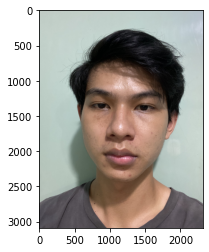

In [ ]:
# Cara load image menggunakan opencv
img = cv.imread('/content/drive/MyDrive/komvis/Rico.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(gray)
plt.imshow(gray)

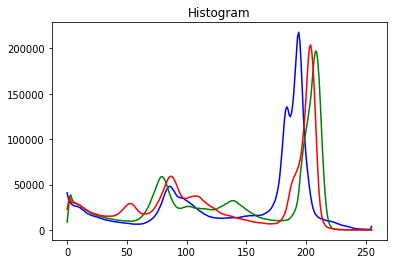

In [ ]:
#Cara menampilkan histogram
warna = ('b', 'g', 'r')
for i,col in enumerate(warna):
  histog = cv.calcHist([gray], [i], None, [256], [0, 256])
  plt.plot(histog, color = col)
plt.title('Histogram')
plt.show()

[[ 360  740 1596 1596]]


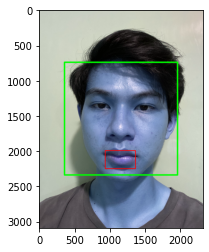

In [ ]:
#Cara mendeteksi face menggunakan algoritma haarcascade 
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/komvis/haarcascade_frontalface_default.xml')
mouth_cascade = cv.CascadeClassifier('/content/drive/MyDrive/komvis/haarcascade_mcs_mouth.xml')
faces = face_cascade.detectMultiScale(gray ,1.3,5)
print(faces)
for (x,y,w,h) in faces:
              cv.rectangle(img,(x, y), (x+w, y+h),(0,255,0),20)
              roi_gray = gray[y:y+h, x:x+w]
              roi_color = img[y:y+h, x:x+w]
              mouth = mouth_cascade.detectMultiScale(roi_gray,1.5,20)
              for (mx, my, mw, mh) in mouth:
                                  cv.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (255, 0, 0), 10)
plt.imshow(img)

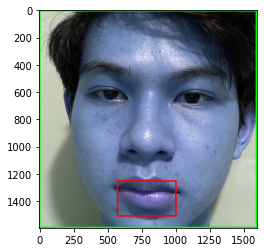

In [ ]:
#Memotong bagian face
face_crop = img[y:y+h,x:x+w]
plt.imshow(face_crop)

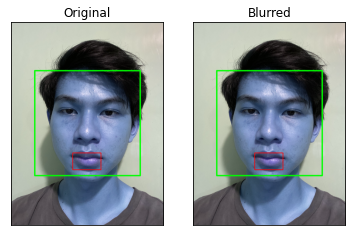

In [ ]:
#Median Filtering
median = cv.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

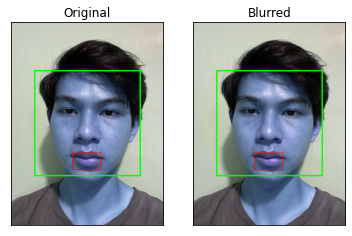

In [ ]:
#Gaus Filtering
blur = cv.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

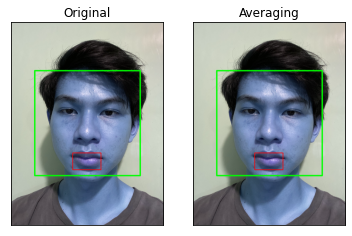

In [ ]:
#Average Filtering
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
faceCascade = cv.CascadeClassifier('/content/drive/MyDrive/komvis/haarcascade_frontalface_default.xml')
model = load_model('/content/drive/MyDrive/komvis/mask_recog.h5')

def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv.cvtColor(face_frame, cv.COLOR_BGR2RGB)
      face_frame = cv.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv.putText(frame, label, (x, y- 10),
                  cv.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)
  return frame

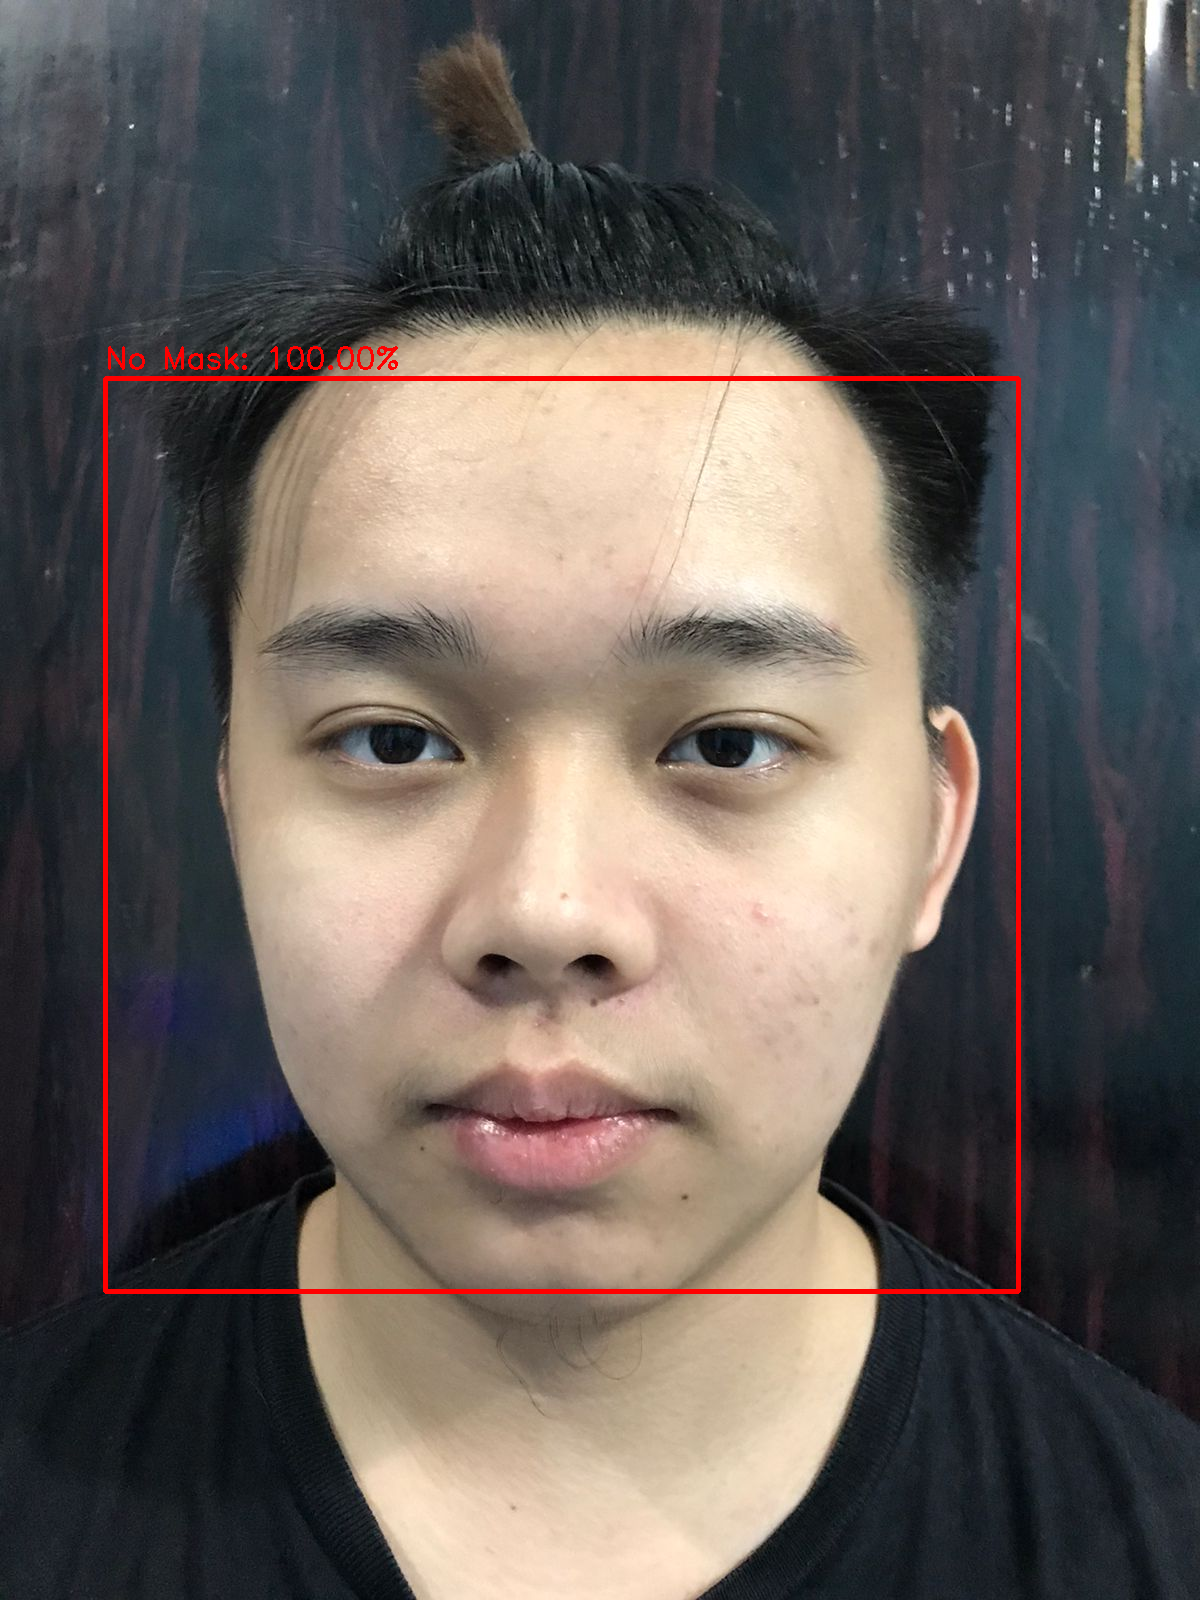

In [ ]:
input_image = cv.imread('/content/drive/MyDrive/komvis/jeco.jpeg')
output = face_mask_detector(input_image)
cv_imshow(output)

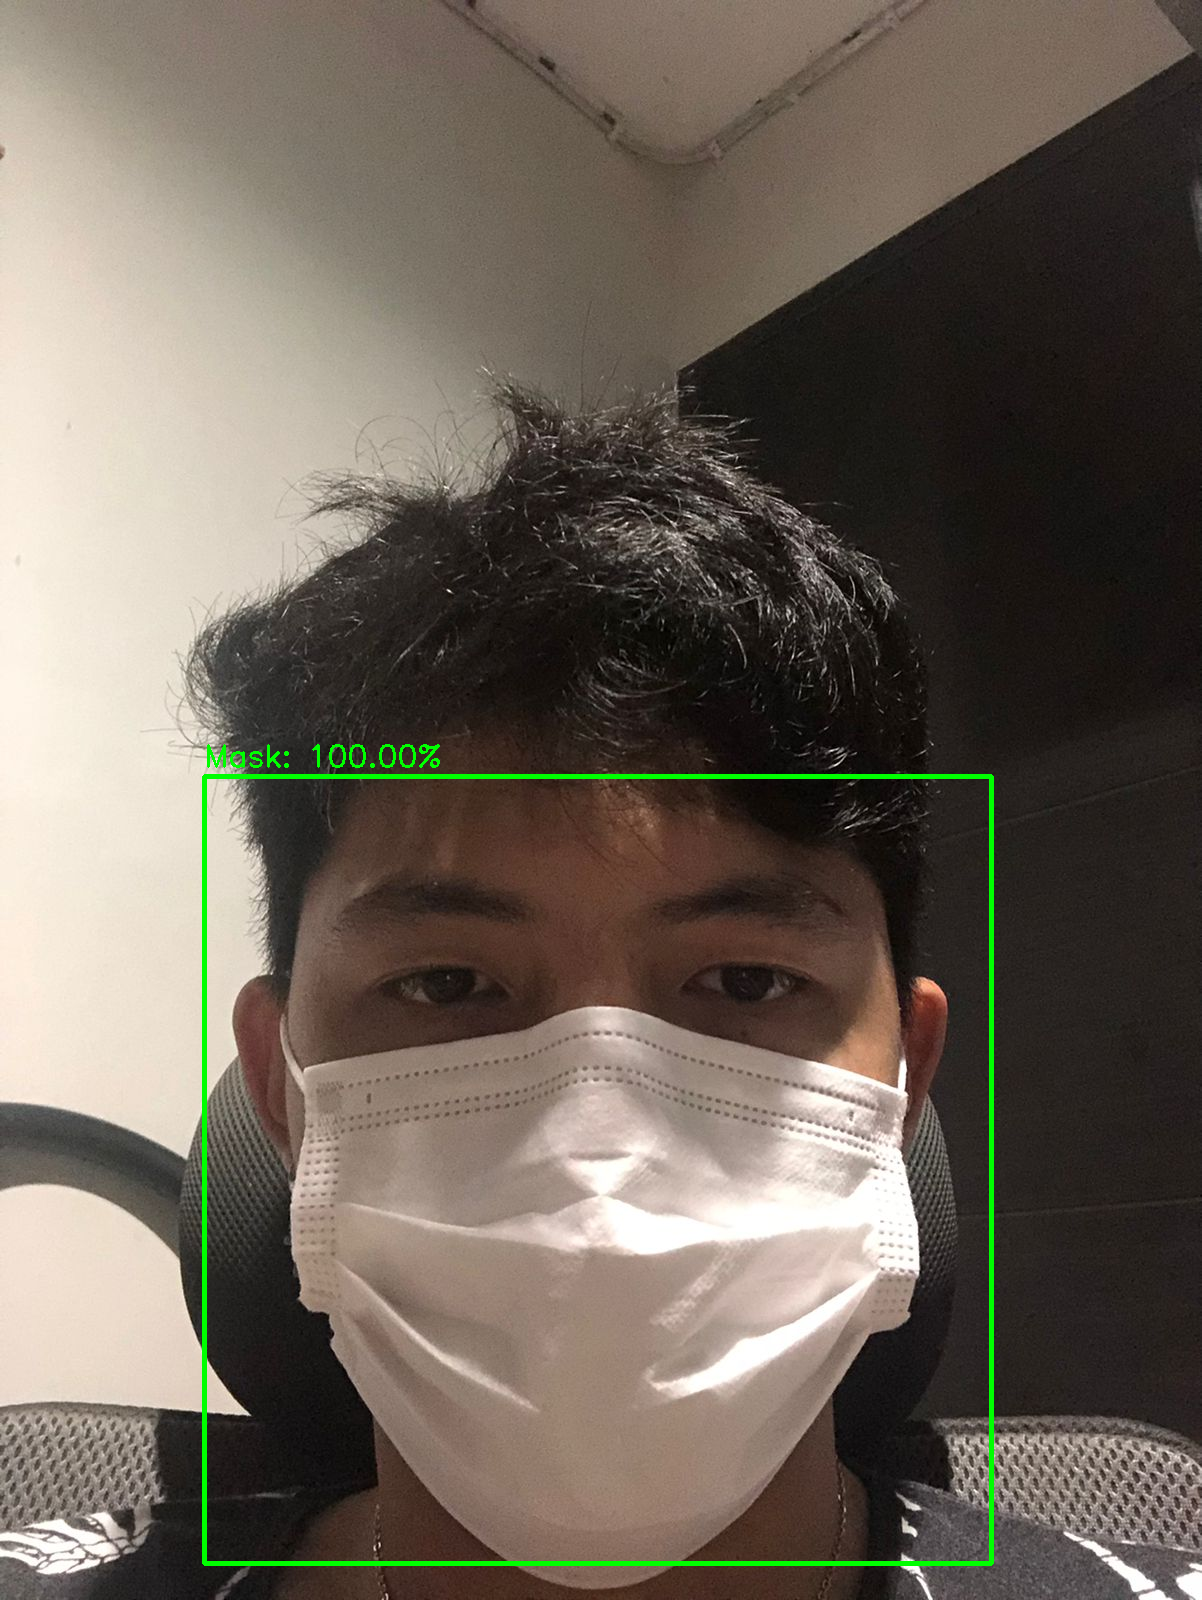

In [ ]:
input_image = cv.imread('/content/drive/MyDrive/komvis/dicky.jpeg')
output = face_mask_detector(input_image)
cv_imshow(output)

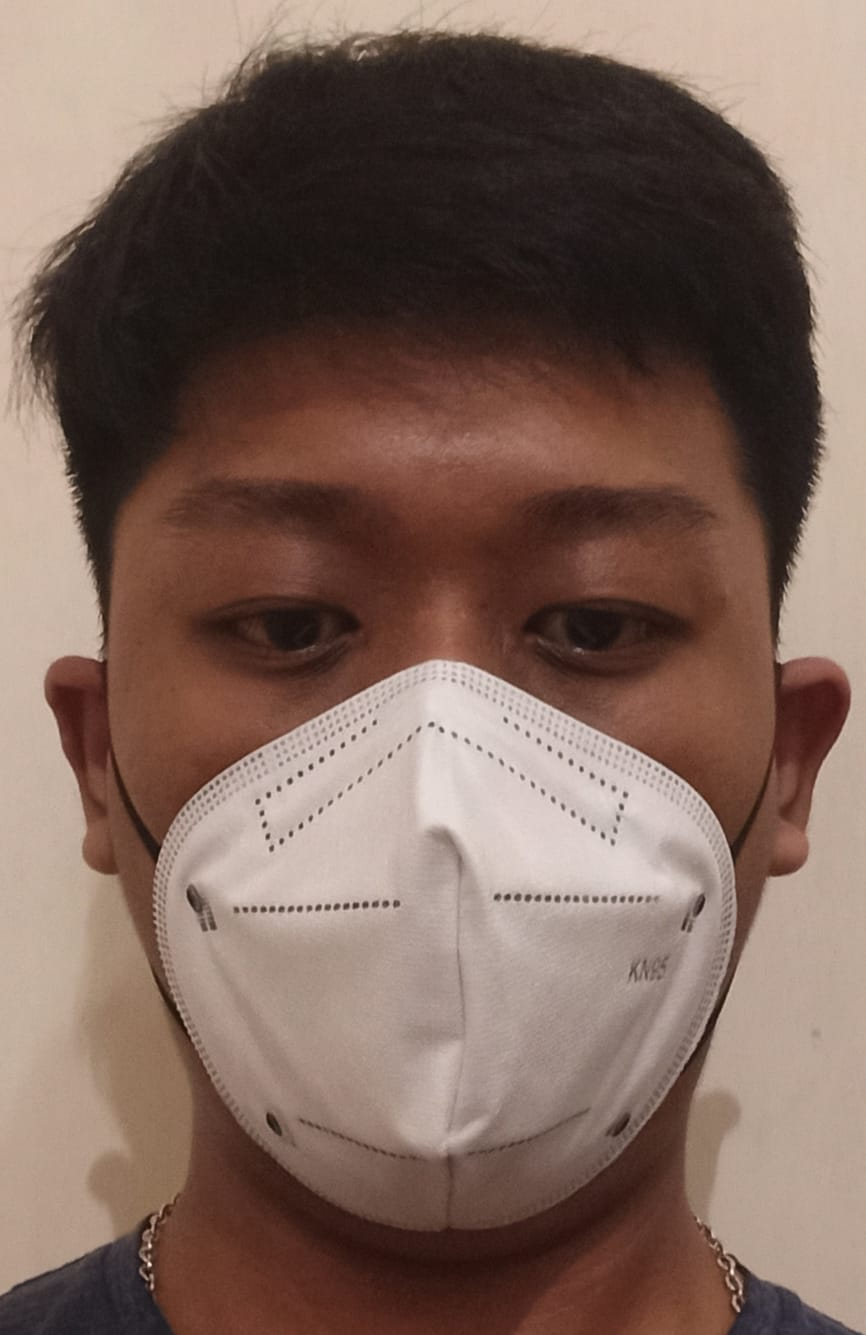

In [ ]:
input_image = cv.imread('/content/drive/MyDrive/komvis/welly.jpeg')
output = face_mask_detector(input_image)
cv_imshow(output)